#### Small Image Processing Library

Functions:

    1) convert color image to greyscale
    2) crop an image

In [14]:
import numpy
import scipy

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Gray Scaling an image

Equation for greyscale conversion comes from:
https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale

    
    a) Y' = 0.299 R + 0.587 G + 0.114 B <-- at the pixel level
    
Note: At least with matplotlib, given the format how I have make the image in grayscale, when plotting the image matrix, you must tell the function to draw the result with the gray color mapping. If you don't then the computer will try to interpolate the ranges present into some color range.
```
plt.imshow(imageMatrix, cmap = plt.get_cmap('gray'))
```

In [15]:
def rgbToGrayEinsum(image):
    """
    image: 3D array (/matrix) which is image
    """
    return numpy.einsum('...j,j', image[...,:3], [0.299, 0.587, 0.114])

##### Rational behind using numpy.einsum():

Iterating over the image and implemening function (a) has less overhead since you are no longer making a copy, but given that I have reduced the problem to a matrix-vector multplication (which by numpy's nature will already be vectorized), I am choosing NOT to iterate over the image pixel by pixel, and am making the bet that the vectoriziation of the operation will negate the performance hit form making the copy. 

Another option would be to drop down to scipy.linalg.blas, however, since I am not very familiar with that and the documentation recommends the higher level functions be used, I chose not to do that. Furthermore, in the assignment, if a langauge other than TypeScript, JavaScript, Python, Scala, or Java were chosen they would need to be justified. While I feel that switching to C++ would be justifiable due to optimization-ability, I have not chosen that route.

Another option that I looked into (and then chose) was using einsum; when reading about it I could not find much evidence as to whether or not it was faster. Therefore, I ran some speed tests comparing against both numpy.dot() and numpy.matmul(); np.einsum was about 4 times faster than numpy.dot(), and numpy.einsum() shaved off about 0.002 seconds from numpy.matmul(). Granted, I ran only about 1000 tests and they were only on my local machine, but they were goood enough for me to use it!

----

### Cropping

By definition, cropping does not allow access to outside of the image. Therefore, if the user puts in a value beyond the appropriate ranges (either too small or too large), those values hit an exception. The other possible option would be to manually map the extreme values to 0 or image.shape constraints; however, I chose not to do that since it would involve editing the user's choices. 

Furthermore, the cropImage function can take in either two opposing corners ((a and d) or (b and c)) of the box you want to crop out.
```
    a -- b
    |    |
    c -- d
```
The function itself will take those and make it into an image defined with 
```
    p1 = (minX, minY) 
    and 
    p2 = (maxX, minY)
    
 ----------------------
    
       -- p2
    |     |
    p1 -- 
    
 (0,0)
```
The limititaion of this method is that I am only allowing you to crop sub-images which are axis-perpedicular (where in this case the edges of the images are your axes). 

Note about cropping ranges:

Normally, one thinks about ordered pairs in terms of (x, y) := x*(1, 0) + y*(0, 1)

However, with how things are set up here things are reversed. The ordered pairs are (y, x) if you're looking at the picture as if it were the xy plane.

In [16]:
def _makeBoundingBox(startPair, endPair):
    """
    startPair: user input y-x pair
    endPair:   user input y-x pair
    """
    
    minX = minY = maxX = maxY = 0
    
    if startPair[0] > endPair[0]:
        minX = endPair[0]
        maxX = startPair[0]
    else:
        minX = startPair[0]
        maxX = endPair[0]
    if startPair[1] > endPair[1]:
        minY = endPair[1]
        maxY = startPair[1]
    else:
        minY = startPair[1]
        maxY = endPair[1]
        
    return minX, minY, maxX, maxY

In [17]:
def cropImage(image, startXY, endXY):
    """
    image  : 3D array (/matrix) which is the image
    startXY: user input y-x pair
    endxY  : user input y-x pair
    """
    minX, minY, maxX, maxY = _makeBoundingBox(startXY, endXY)

    if (minX < 0 or 
        minY < 0 or 
        maxX > image.shape[0] or 
        maxY > image.shape[1] or
        minX == maxX or
        minY == maxY
       ):
        raise RuntimeError('invalid cropping parameters specified')
    
    return image[minX:maxX , minY:maxY]

### Usage:

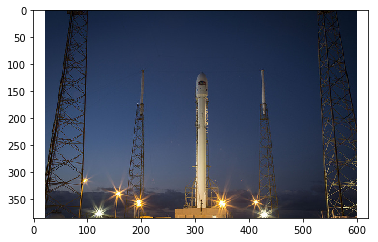

In [18]:
image = mpimg.imread('image.jpg')
plt.imshow(image)
plt.show()

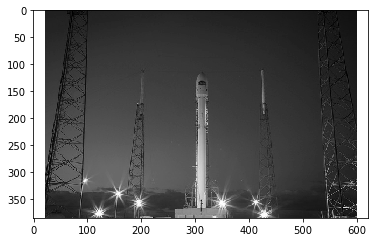

In [19]:
gray = rgbToGrayEinsum(image)
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

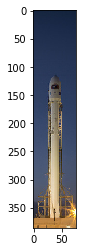

'x' range is: [275, 350]
'y' range is: [0,  386 ]


In [20]:
cropped = cropImage(image, (0, 275), (image.shape[0], 350))
plt.imshow(cropped)
plt.show()
print("'x' range is: [275, 350]")
print("'y' range is: [0, ", image.shape[0], "]")